In [ ]:
#GreenTrip Data

import pandas as pd
import csv
from pandas import DataFrame
data=pd.read_csv("../../Data/GreenTaxi/green_tripdata_2016-01.csv",sep=",")
data=data[data.pickup_date=="1/1/16"]
data=data[data.Pickup_latitude!=0]
df = data.sample(n=20000)
df.to_csv("output/random.csv",sep=",")
pd.to_datetime(df['pickup_time']).dt.time
df['pickup_time_hour'] = pd.to_datetime(df['pickup_time']).dt.hour
df['drop_time_hour'] = pd.to_datetime(df['drop_time']).dt.hour
df.count()
df=df[df.Dropoff_latitude!=0]
df.to_csv("output/Time_Drop_Hour.csv",sep=",")


In [ ]:
localdf=pd.read_csv("Time_Drop_Hour.csv",sep=",")
parseData=localdf[501:1001]
parseData.count()
parseData.to_csv("output/Temp.csv")

In [ ]:
##API Requests to get JSON DATA for coordinates
import os
import requests
import csv
import json
api_key=os.getenviron("env_key")
def fxy(x,y,z):
    url="https://maps.googleapis.com/maps/api/geocode/json?latlng="+x+","+y+"&key="+api_key
    jsonData=requests.get(url).json()
    filename=x+"_"+y+".json"
    with open('../../Data/CoordinatesLocation/'+z+"/"+filename, 'w') as outfile:
            json.dump(jsonData['results'][0]['address_components'], outfile)
    str=jsonData['results'][0]['address_components'][3]['long_name']
    return str

parseData['pickup_location'] = parseData.apply(lambda x: fxy(str(x['Pickup_latitude']),str(x['Pickup_longitude']),'Pickup'),axis=1)
parseData['drop_location'] = parseData.apply(lambda x: fxy(str(x['Dropoff_latitude']),str(x['Dropoff_longitude']),'DropOff'),axis=1)
with open("PickupDropLocations.csv", 'a') as f:
    parseData.to_csv(f, header=False)

In [5]:
import pandas as pd

pickupData=pd.read_csv("output/PickupDropLocations.csv",sep=",")[['pickup_time_hour','pickup_location']]
pickupOutput=pickupData.groupby(['pickup_time_hour','pickup_location'])['pickup_location'].agg({'count'}).reset_index()
pickupOutput.to_csv("output/PickupLocation.csv",sep=",")


dropData=pd.read_csv("output/PickupDropLocations.csv",sep=",")[['drop_time_hour','drop_location']]
dropDataOutput=dropData.groupby(['drop_time_hour','drop_location'])['drop_location'].agg({'count'}).reset_index()
dropDataOutput.to_csv("output/DropLocation.csv",sep=",")

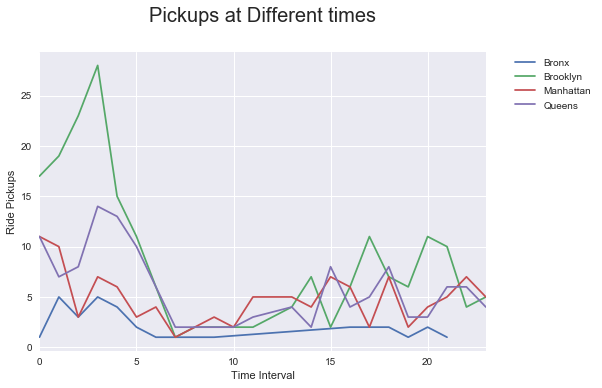

In [6]:
#Plot to show Pick up at differnet locations

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import matplotlib.dates as mdates
dfo=pd.read_csv('output/PickupLocation.csv')
dfo.head(5)
dfo

l='Bronx,Brooklyn,Manhattan,Queens'
L=l.split(',')
dfo['Dummy']=0
dfo=dfo[dfo['pickup_location'].isin(L)] 
fig,ax=plt.subplots()
sns.tsplot(dfo,time="pickup_time_hour",unit="Dummy",condition="pickup_location", value="count",legend=True,ax=ax)
plt.title('Pickups at Different times',fontsize=20,y=1.08)
plt.xlabel('Time Interval')
plt.ylabel('Ride Pickups')

#plt.figtext(1.0, 1.10, 'Date Generated:'+str(datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')), horizontalalignment='right')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.3)

#fig.autofmt_xdate()
fig1 = plt.gcf()
plt.show()
fig1.savefig("graph/pickup.png")

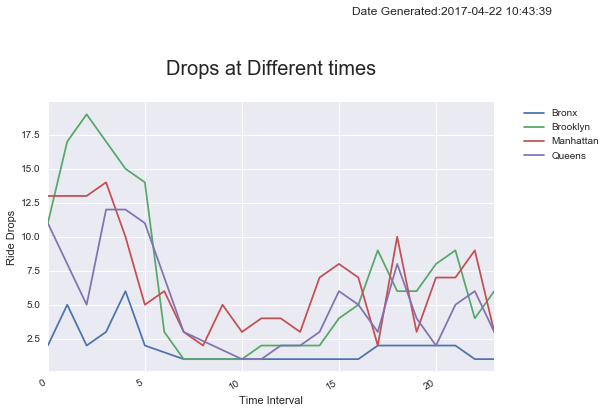

In [15]:
#Plot to show Pick up at differnet locations

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import matplotlib.dates as mdates
dfot=pd.read_csv('output/DropLocation.csv',sep=",")


l='Bronx,Brooklyn,Manhattan,Queens'
L=l.split(',')
dfot['Dummy']=0
dfot.head()
dfot=dfot[dfot['drop_location'].isin(L)] 
dfot.head()
fig,ax=plt.subplots()
sns.tsplot(dfot,time="drop_time_hour",unit="Dummy",condition="drop_location", value="count",legend=True,ax=ax)
plt.title('Drops at Different times',fontsize=20,y=1.08)
plt.xlabel('Time Interval')
plt.ylabel('Ride Drops')

plt.figtext(1.0, 1.10, 'Date Generated:'+str(datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')), horizontalalignment='right')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.3)

fig.autofmt_xdate()
fig1 = plt.gcf()
plt.show()
fig1.savefig("graph/drop.png")

In [ ]:
pickupDropLoc=pd.read_csv("output/PickupDropLocations.csv",sep=",")


/Users/nirmal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


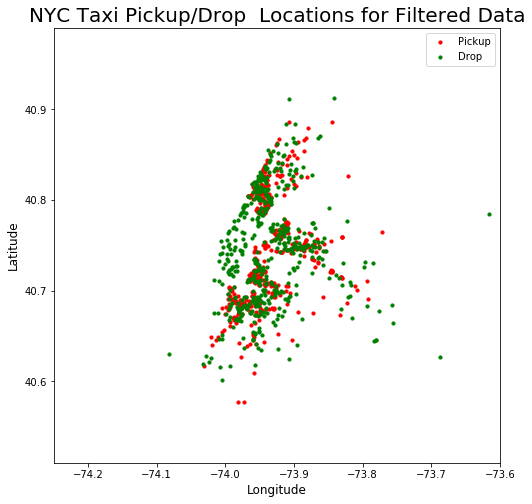

In [38]:
#Plot to show Pickup Drop locations

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
plt.scatter(pickupDropLoc['Pickup_longitude'], pickupDropLoc['Pickup_latitude'], color='red', s=10, label='Pickup')
plt.scatter(pickupDropLoc['Dropoff_longitude'], pickupDropLoc['Dropoff_latitude'], color='green', s=10, label='Drop')
plt.title('NYC Taxi Pickup/Drop  Locations for Filtered Data', fontsize='20')
plt.xlabel('Longitude', fontsize='12')
plt.ylabel('Latitude', fontsize='12')
plt.xlim(-74.25,-73.60)   
plt.ylim(40.51, 40.99) 
plt.gca().set_axis_bgcolor('white')
plt.legend()
plt.show()